In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("Metabolic Syndrome.csv")
data.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [4]:
data.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


In [5]:
# lets check for the null values
data.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

Preprocessing

In [6]:
# label encoding the data to further preprocess with imputation

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
cat = data.select_dtypes(include='object')

for col in cat.columns:
    data[col] = encoder.fit_transform(data[col])

In [10]:
data=data.drop(columns=['seqn'])
data.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,1,3,8200.0,5,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,0,1,4500.0,5,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,1,3,800.0,0,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,0,3,2000.0,1,120.4,33.3,0,5.22,5.0,104,73,141,0
4,51,1,1,NaN,0,81.1,20.1,0,8.13,5.0,95,43,126,0


In [11]:
# imputing all the numeric columns

from sklearn.impute import SimpleImputer

imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_median.fit(data)

imputedData= imputer_median.transform(data)

newData = pd.DataFrame(imputedData, columns=data.columns)
newData.head()


,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22.0,1.0,3.0,8200.0,5.0,81.0,23.3,0.0,3.88,4.9,92.0,41.0,84.0,0.0
1,44.0,0.0,1.0,4500.0,5.0,80.1,23.2,0.0,8.55,4.5,82.0,28.0,56.0,0.0
2,21.0,1.0,3.0,800.0,0.0,69.6,20.1,0.0,5.07,5.4,107.0,43.0,78.0,0.0
3,43.0,0.0,3.0,2000.0,1.0,120.4,33.3,0.0,5.22,5.0,104.0,73.0,141.0,0.0
4,51.0,1.0,1.0,2500.0,0.0,81.1,20.1,0.0,8.13,5.0,95.0,43.0,126.0,0.0


In [12]:
# checking for the null values

newData.isnull().sum()


Age                  0
Sex                  0
Marital              0
Income               0
Race                 0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64

<Axes: >

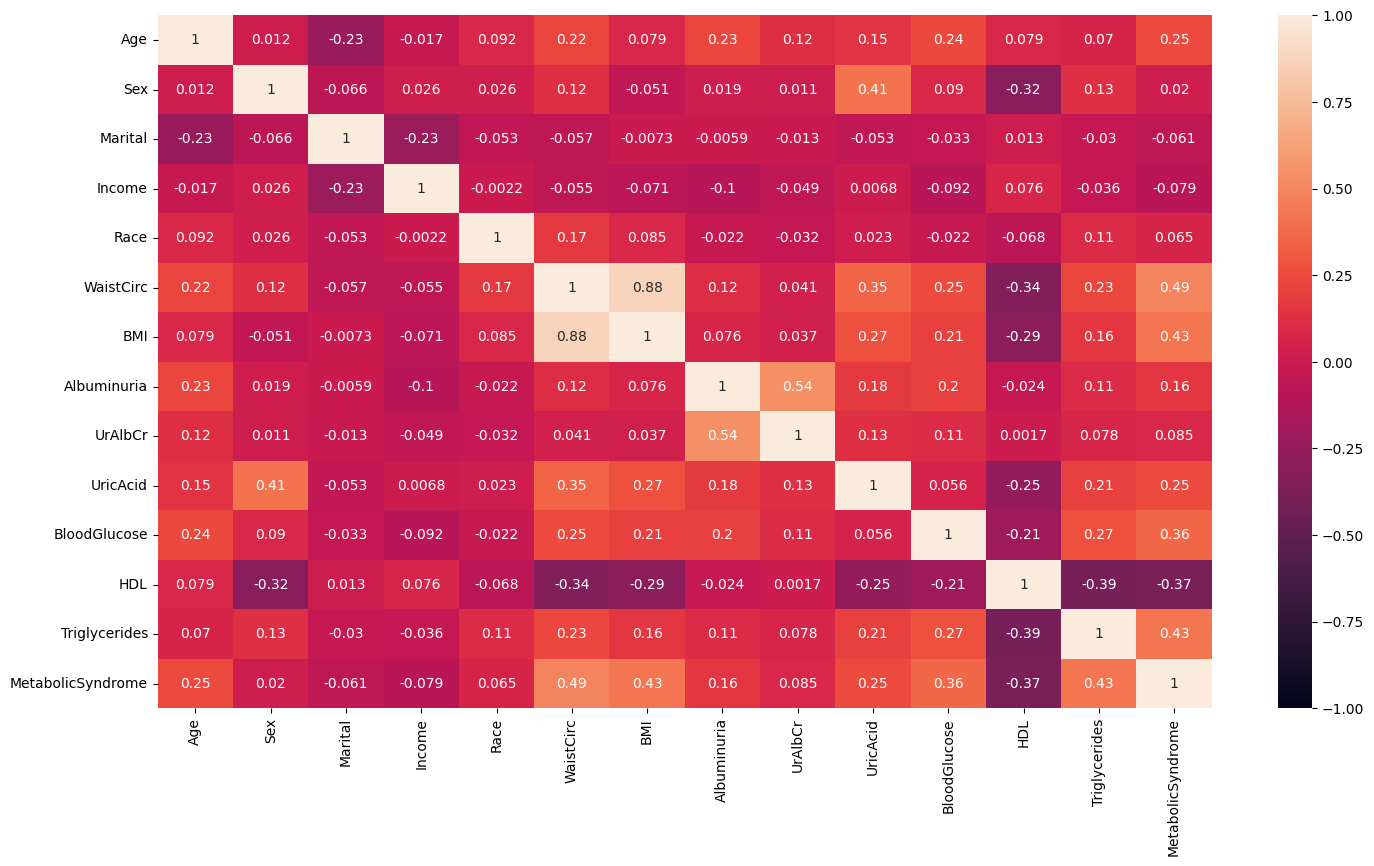

In [13]:
# checking correlation
plt.figure(figsize=(17,9))
corr= newData.corr()
sns.heatmap(corr, annot=True, vmax=1, vmin=-1)

## Now developing the models...

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X= newData.drop(columns=['MetabolicSyndrome'])
y= newData['MetabolicSyndrome']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# # scaling the train and test data
# scaler= StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit(X_test)

### Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier()
cls.fit(X_train, y_train)

# Now checking the metrics
from sklearn.metrics import accuracy_score, classification_report

y_pred = cls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
clsReport= classification_report(y_test, y_pred)

print("accuracy:", round(acc, 3))
print()
print(clsReport)

accuracy: 0.857

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       324
         1.0       0.79      0.77      0.78       157

    accuracy                           0.86       481
   macro avg       0.84      0.83      0.84       481
weighted avg       0.86      0.86      0.86       481



## Ensemble techniques 

In [17]:
from sklearn.ensemble import RandomForestClassifier


cls= RandomForestClassifier()
cls.fit(X_train, y_train)

# now checking the metric
from sklearn.metrics import accuracy_score, classification_report

y_pred = cls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
clsReport= classification_report(y_test, y_pred)

print("accuracy:", round(acc, 3))
print()
print(clsReport)

accuracy: 0.877

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       324
         1.0       0.83      0.78      0.81       157

    accuracy                           0.88       481
   macro avg       0.86      0.85      0.86       481
weighted avg       0.88      0.88      0.88       481



### XG-BOOST MODEL

In [18]:
from xgboost import XGBClassifier

model = XGBClassifier(objective='binary:logistic',  # classification : binary
                    n_estimators=100,  # Number of trees in the ensemble
                    learning_rate=0.1,  # Learning rate for each tree
                    max_depth=5,  # Maximum depth of trees
                    gamma=0.0,  # Minimum loss reduction per split
                    subsample=0.8,  # Fraction of samples used per tree
                    colsample_bytree=0.8,  # Fraction of features used per tree
                    reg_lambda=1.0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

y_pred = cls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
clsReport= classification_report(y_test, y_pred)

print("accuracy:", round(acc, 3))
print()
print(clsReport)

accuracy: 0.877

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       324
         1.0       0.83      0.78      0.81       157

    accuracy                           0.88       481
   macro avg       0.86      0.85      0.86       481
weighted avg       0.88      0.88      0.88       481

